<a href="https://colab.research.google.com/github/hmelberg/health-analytics-using-python/blob/dev/1_Appetizers_Some_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Health Analytics in Python using Pandas



Hans Olav Melberg, Nashville, November, 2019


---



---




##Why?

Python and Pandas provide tools that make it easy to do complicated analysis on data that is often messy in a way that is both fast, readable, and reproducible. It is also free, it comes with a large and friendly user community, and it has an extensive collection of libraries that we can use for everything from visualizations to machine learning. 

All this is true, but the real proof of the pudding is not cheap talk. Let's instead jump right into some examples that demonstrate the power of Python and its tools. These examples are meant as appetizers, and although I show the code, I will not explain all the details. The point is more to demonstrate that it is possible, using very little code, to quickly analyse health data using Python. The details of the code will be explained in later chapters.

BY the way, if you are reading this using a notebook (click on the colab link on top of this notebook), you can run and modify the code by typing CTRL+ENTER when you are in a cell.


### Get necessary libraries and data - and a warning!

For the examples below, we will use a sample of synthetic data based on inpatient hospital stays from Medicare in the US. The data is derived from real data, but modified and the results below are meant to illustrate the methods and should not be interpreted as representing real or substantive conclusions.

In [0]:
# Use pandas
import pandas as pd

In [0]:
# Read synthetic medicare sample data on inpatient hospital stays
path = 'https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/Downloads/'
inpatient_file = 'DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.zip'

df = pd.read_csv(path+inpatient_file)


We import the pandas library, and use functions from this library by typing *pd.* and the name of the function we want to use. A useful hint is that it is often possible to press TAB after typing a dot and you will see a list of available functions or methods. For instance typing `pd.rea` and then TAB will give you many options, including `read_csv`, `read_excel`, and - one of the hidden gems - `read_clipboard()` which will try to read whatever you just copied to the clipboard into a dataframe.

Note, by the way, that Pandas easily reads files from the internet, including zipped csv files. There is also a `read_table` function which can be used to read tables you find on a web page, for instance Wikipedia tables.

We can give the object we read whatever names we want. Giving objects short, but informative names is always a challenge. We will start by simply naming our data *df* which is short for *dataframe*, but when we get more objects we have to become more imaginative and avoid using the - unfortunately not yet criminalized - practice of naming objects df1, df2, df3. Please do not do this! Suddenly you have twenty objects and you will be confused if they do not have meaningful names.

## First look

In [0]:
# First look
df.head()

,DESYNPUF_ID,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,CLM_PMT_AMT,NCH_PRMRY_PYR_CLM_PD_AMT,AT_PHYSN_NPI,OP_PHYSN_NPI,OT_PHYSN_NPI,CLM_ADMSN_DT,ADMTNG_ICD9_DGNS_CD,CLM_PASS_THRU_PER_DIEM_AMT,NCH_BENE_IP_DDCTBL_AMT,NCH_BENE_PTA_COINSRNC_LBLTY_AM,NCH_BENE_BLOOD_DDCTBL_LBLTY_AM,CLM_UTLZTN_DAY_CNT,NCH_BENE_DSCHRG_DT,CLM_DRG_CD,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,ICD9_PRCDR_CD_1,ICD9_PRCDR_CD_2,ICD9_PRCDR_CD_3,ICD9_PRCDR_CD_4,ICD9_PRCDR_CD_5,ICD9_PRCDR_CD_6,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,...,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,HCPCS_CD_14,HCPCS_CD_15,HCPCS_CD_16,HCPCS_CD_17,HCPCS_CD_18,HCPCS_CD_19,HCPCS_CD_20,HCPCS_CD_21,HCPCS_CD_22,HCPCS_CD_23,HCPCS_CD_24,HCPCS_CD_25,HCPCS_CD_26,HCPCS_CD_27,HCPCS_CD_28,HCPCS_CD_29,HCPCS_CD_30,HCPCS_CD_31,HCPCS_CD_32,HCPCS_CD_33,HCPCS_CD_34,HCPCS_CD_35,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,00013D2EFD8E45D1,196661176988405,1,20100312.0,20100313.0,2600GD,4000.0,0.0,3.139084e+09,NaN,NaN,20100312,4580,0.0,1100.0,0.0,0.0,1.0,20100313,217,7802,78820,V4501,4280,2720,4019,V4502,73300,E9330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00016F745862898F,196201177000368,1,20090412.0,20090418.0,3900MB,26000.0,0.0,6.476809e+09,NaN,NaN,20090412,7866,0.0,1068.0,0.0,0.0,6.0,20090418,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00016F745862898F,196661177015632,1,20090831.0,20090902.0,3900HM,5000.0,0.0,6.119985e+08,6.119985e+08,NaN,20090831,6186,0.0,1068.0,0.0,0.0,2.0,20090902,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,6186,V5866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00016F745862898F,196091176981058,1,20090917.0,20090920.0,3913XU,5000.0,0.0,4.971603e+09,NaN,1.119000e+09,20090917,29590,0.0,1068.0,0.0,0.0,3.0,20090920,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00016F745862898F,196261176983265,1,20100626.0,20100701.0,3900MB,16000.0,0.0,6.408400e+09,1.960860e+09,NaN,20100626,5849,0.0,1100.0,0.0,0.0,5.0,20100701,983,3569,4019,3542,V8801,78820,2639,7840,7856,4271,NaN,NaN,E8889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# List all column names
df.columns

Index(['DESYNPUF_ID', 'CLM_ID', 'SEGMENT', 'CLM_FROM_DT', 'CLM_THRU_DT',
       'PRVDR_NUM', 'CLM_PMT_AMT', 'NCH_PRMRY_PYR_CLM_PD_AMT', 'AT_PHYSN_NPI',
       'OP_PHYSN_NPI', 'OT_PHYSN_NPI', 'CLM_ADMSN_DT', 'ADMTNG_ICD9_DGNS_CD',
       'CLM_PASS_THRU_PER_DIEM_AMT', 'NCH_BENE_IP_DDCTBL_AMT',
       'NCH_BENE_PTA_COINSRNC_LBLTY_AM', 'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM',
       'CLM_UTLZTN_DAY_CNT', 'NCH_BENE_DSCHRG_DT', 'CLM_DRG_CD',
       'ICD9_DGNS_CD_1', 'ICD9_DGNS_CD_2', 'ICD9_DGNS_CD_3', 'ICD9_DGNS_CD_4',
       'ICD9_DGNS_CD_5', 'ICD9_DGNS_CD_6', 'ICD9_DGNS_CD_7', 'ICD9_DGNS_CD_8',
       'ICD9_DGNS_CD_9', 'ICD9_DGNS_CD_10', 'ICD9_PRCDR_CD_1',
       'ICD9_PRCDR_CD_2', 'ICD9_PRCDR_CD_3', 'ICD9_PRCDR_CD_4',
       'ICD9_PRCDR_CD_5', 'ICD9_PRCDR_CD_6', 'HCPCS_CD_1', 'HCPCS_CD_2',
       'HCPCS_CD_3', 'HCPCS_CD_4', 'HCPCS_CD_5', 'HCPCS_CD_6', 'HCPCS_CD_7',
       'HCPCS_CD_8', 'HCPCS_CD_9', 'HCPCS_CD_10', 'HCPCS_CD_11', 'HCPCS_CD_12',
       'HCPCS_CD_13', 'HCPCS_CD_14', 'HCPCS_CD_15', 

##Explanation of variable names

[Explanations from ResDac, HTML](https://www.resdac.org/cms-data/files/ip-encounter-final/data-documentation)

##Warm up example: Mean cost per visit, and mean payment made by the patient

The data contains several variables that are relevant for payments:
* A claim payment amount: *CLM_PMT_AMT*
  * Note: The variable does not include all costs 
* Deductible Amount: *NCH_BENE_IP_DDCTBL_AMT*


In [0]:
# The mean of a column 
df['CLM_PMT_AMT'].mean()

9573.632755754572

If this is the true costs, we would then conclude that an average hospital episode create a claim of 9573 dollars.

Note the structure of the code: We first type the name of the general object (df). We then select a given column, and finally use the method *mean()* on the column. It is important to note this structure because it is a general pattern that we will use. Some find it natural, but others find it confusing until they realize the logic. An alternative to the object oriented approach is a functional approach:
* Functional approach: *mean(age)*  
* Object oriented approach: *age.mean()* 

Python can use both approaches, but working with dataframes and Pandas, the object oriented approach is dominant. Both approaches are fine - there is no reason to get into religious wars here, just be aware of the difference in the way you structure the code.

Notice that the object oriented approach lends itself naturally to chaining where you just add methods to the result of the previous method in the chain, while the functional approach use nested chains or piping to do the same:
* Method chaining: `age.mean().plot()` 
* Nested functions: `plot(mean(age))` 
* Piping: `age.pipe(mean).pipe(plot)`

Pandas - and life? - becomes easier once you understand that it is object oriented - and that this is how you should structure code when trying to torture data when using Pandas. 

If you want more details on chains, functions and pipes, Tom Augspurger has a good discussion in his book [Modern Pandas](https://tomaugspurger.github.io/method-chaining.html). The basic argument is that the code should almost read like a sentence: Take object X, select a subgroup, calculate the mean, make a plot.

Here we go on to some other examples:

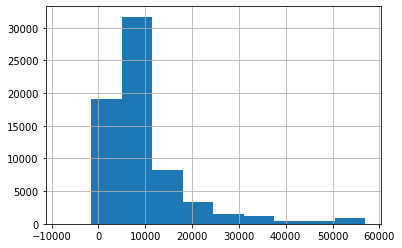

In [0]:
# Histogram showing claims per visit
df.CLM_PMT_AMT.hist();

Note that in this code we selected a column without using the square brackets [...]. In Pandas it is possible to select a column by using the dot notation as well as the square brackets. In other words:
`df.clm_pmt_amt.mean()`
does the same as:
`df['clm_pmt_amt'].mean()`

The dot notation is easier, and it is commonly used for exploration, but the square bracket convention is better for long term use. It makes a clearer distinction between variables and methods. For instance, if you happen to name one of your columns mean (which you should not!), it can be confused with the method that finds the mean in the dot notation:
* Confusingly similar and may give errors: `age.mean.mean() `
* Less confusing and will always work: `age['mean'].mean()`

In other words, the rule is that selection on objects is done by square brackets [..], while methods are applied to objects using dot notation.

But practicality sometimes beats purity, and you will often see the dot notation used to select a column. Whatever you prefer, just make sure to use column names that are sensible, and not identical to method names. A common gotcha, for instance, is to name a column *first*, but this is a reserved method name (which takes selects the first row in a group) and we should not use it as a column name.

Here is an example when the selection using dot becomes unclear due to a long variable name:

In [0]:
# How much of the claim was paid by the patient?

# Using dot notation for column selection
df.NCH_BENE_IP_DDCTBL_AMT.mean()

# Using square brackets for column selection
df['NCH_BENE_IP_DDCTBL_AMT'].mean()



1057.0588435637433

The average deductible per event is around 1000 USD.

Note that the automatic color marking in notebooks only highlights the variable name if it is within square brackets and not dot selected column names.

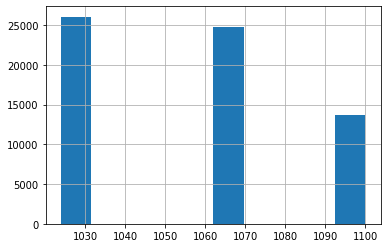

In [0]:
# There seems to be three common deductible amounts
df['NCH_BENE_IP_DDCTBL_AMT'].hist();

## Data preparation

Before going on to the other examples, it might be helpful to make a few changes to the data. First, one of the variables we are going to use very often is the personal identifier. In the original data this is called *desynpuf_id* but it will be easier to make a copy called *pid*. I also prefer lower case column names to avoid having to press Caps Lock all the time.

In [0]:
# easier to use pid than desynpuf_id
df['pid']=df.desynpuf_id

# lower case column names
df.columns=df.columns.str.lower()

##Example 1: What percentage of patients have 1, 2 .. 10 inpatient visits to the hospital?

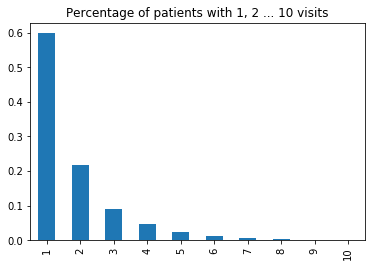

In [0]:
(df.groupby('pid')      # Split the dataframe based on person id
          .size()       # Find the size of each of the splitted dataframes 
          .value_counts(normalize=True) # Count % of persons with 1,2 ... visits
          .sort_index() # Sort results  
          .head(10)     # Select the first 10 
          .plot.bar(title='Percent of patients with 1, 2 ... 10 visits')
);

## Example 2: How many patients with hospital visits in 2009 also had a visit in 2010



In [0]:
# mark all visits from 2010 
# the  date is in the *clm_adms_dt* column and we give visits from 2009 the name visits_2009
# but it is a numeric format and to extract the first four we must first make it a string)

visit_2009 = df.clm_admsn_dt.astype(str).str.startswith('2009')
visit_2010 = df.clm_admsn_dt.astype(str).str.startswith('2010')

Find the unique identification number for all patients in 2009 and 2010.

In [0]:
patient_2009 = set(df[visit_2009].pid.unique())
patient_2010 = set(df[visit_2010].pid.unique())

How many of the persons are in both sets (2009 and 2010)?

In [0]:
both = patient_2009 & patient_2010

len(both)/len(patient_2009)

0.13406605075926517

13% of the patients registered in 2009 also had an inpatient hospital episode in 2010.

## Example 3: Do some costly patients make up a large share of the costs?

Decision makers are often interested in factors that affect total costs. This has led to an interest in learning more about the extent to which hospital costs are affected by a relatively small share of very costly patients. 

Here is some code that help answer this question.



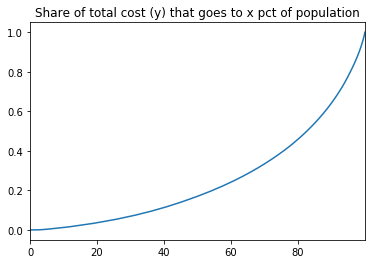

In [0]:
all_payments = df.clm_pmt_amt.sum()

costs = (df.groupby('pid')
              .clm_pmt_amt
              .sum()
              .div(all_payments)
              .sort_values()
              .cumsum()
              .reset_index())

costs.index = (costs.index / len(costs))*100

costs.plot(title = 'Share of total cost (y) that goes to x pct of patients',
           legend=None);


The code may not be obvious, but if we express it in words, all we do is:
- sum the cost for each patient (all events for that person)
- divide this sum by the total cost for all patients to find the percentage of all costs that goes to each patient
- make a cumulative sum of the costs, starting with the patient that has the smallest costs, and going up to the most costly patient (i.e. we sort before we apply the cumsum() method)

This gives us a column with the share of the costs that goes to, for instance, the first 3000 patients with the lowest cost (since the series is sorted). 

It would be easier to interpret this if we change the unit from 'number of patients' to 'percentage of patients.' Instead of saying that patients from 0 to 3000 gets 21% of the health spending, we could then say that 'half of the patients get 21% of the spending.' 

To go from an absolute number of persons to the percentage, we first reset the index which means that the index becomes a number counting from 0 and up. To calculate the percent corresponding to a patient number (say 3000), all we need to do is to divide the patient number in the index by the total number of patients. 

And then we plot! 

Not only do we plot. We sit back, look at the code, and marvel at the tools that make it possible to do so much with so little. We reflect on this and say thank you to Guido, Wes and all those who built the tools. And, we translate the warm feeling into a donation to [Numfocus](https://numfocus.org/donate) and [The Python Software Foundation](https://www.python.org/psf/donations/) that help to maintain the ecosystem and its communities.

Yes!

And now back to something not so completely different.

So far we have made a plot that tells us how much of the spending that goes to x% of the patients. n addition to the plot, we need a number to communicate to those who cannot interpret the plot right away. For instance, to say something about how much of the spending that goes to the most expensive patients, we could find the percentage of the spending that goes to the 20% most expensive patients:


In [0]:
eighty_pct = int(len(costs)*0.8)

costs.iloc[eighty_pct]


pid            7177889B3B0200AD
clm_pmt_amt            0.458308
Name: 80.0, dtype: object

Conclusion:
* 80% of the patients receive 46% of the spending
* In other words, the 20% most expensive patients, represent 54% of all costs

Exercise
* Topic: Are the expensive patients chronically expensive, or do they just happen to be unlucky in a given year?
* Specific question: What share of the top 20% most expensive that also are in the top 20% in the next year?

## Example 4: What are the most common diseases?

The column *clm_drg_cd* indicates the claim's Diagnosis Related Group code for the event. Although not a perfect categorization of different diseases, we can use it to get an impression of which diseases are most common for inpatient hospital admissions. We start by counting how often the different codes are used:

In [0]:
df.clm_drg_cd.value_counts(normalize=True)

882    0.004223
177    0.004208
886    0.004118
887    0.004103
880    0.003954
         ...   
769    0.000045
782    0.000045
767    0.000045
780    0.000030
927    0.000030
Name: clm_drg_cd, Length: 739, dtype: float64

But this is not very helpful since we do not know what diseases code 882 or 177 etc represent. We need a codebook! 

In [0]:
drg_codebook = pd.read_csv('https://www.nber.org/drg/drgweight2010.csv')
# Becase the drg is a string in the df, we need to convert it to a string here too
drg_codebook['drg'] = drg_codebook['drg'].astype(str) 
drg_codebook.head()

,drg,drgnum,drgweight,drgdesc,drgsys,drgvers,glos,trim,low,alos,postacute,specialpay,mdc,medsurg,fydate,fyear,mdcdesc
0,1,1,24.8548,1: HEART TRANSPLANT OR IMPLANT OF HEART ASSIST...,MS-DRG,27,31.5,0,NaN,43.900002,No,No,0.0,SURG,10/1/2009,2010,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
1,2,2,11.7540,2: HEART TRANSPLANT OR IMPLANT OF HEART ASSIST...,MS-DRG,27,16.4,0,NaN,21.200001,No,No,0.0,SURG,10/1/2009,2010,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
2,3,3,18.2667,"3: ECMO OR TRACH W MV 96+ HRS OR PDX EXC FACE,...",MS-DRG,27,31.6,0,NaN,38.500000,Yes,No,0.0,SURG,10/1/2009,2010,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
3,4,4,11.1941,"4: TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH &...",MS-DRG,27,22.9,0,NaN,28.200001,Yes,No,0.0,SURG,10/1/2009,2010,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
4,5,5,10.1358,5: LIVER TRANSPLANT W MCC OR INTESTINAL TRANSP...,MS-DRG,27,14.9,0,NaN,20.299999,No,No,0.0,SURG,10/1/2009,2010,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC


Make a dictionary with codes to its text description from the information in the dataframe: 

In [0]:
drg2text = drg_codebook.set_index('drg').drgdesc.to_dict()

Now we can count the drg codes and use *rename* and our newly created dictionary with codes and text, to change the index from coded numbers to plain text.

In [0]:
df.clm_drg_cd.value_counts(normalize=True).rename(index=drg2text)

882: NEUROSES EXCEPT DEPRESSIVE                                           0.004223
177: RESPIRATORY INFECTIONS & INFLAMMATIONS W MCC                         0.004208
886: BEHAVIORAL & DEVELOPMENTAL DISORDERS                                 0.004118
887: OTHER MENTAL DISORDER DIAGNOSES                                      0.004103
880: ACUTE ADJUSTMENT REACTION & PSYCHOSOCIAL DYSFUNCTION                 0.003954
                                                                            ...   
769: POSTPARTUM & POST ABORTION DIAGNOSES W O.R. PROCEDURE                0.000045
782: OTHER ANTEPARTUM DIAGNOSES W/O MEDICAL COMPLICATIONS                 0.000045
767: VAGINAL DELIVERY W STERILIZATION &/OR D&C                            0.000045
780: FALSE LABOR                                                          0.000030
927: EXTENSIVE BURNS OR FULL THICKNESS BURNS W MV 96+ HRS W SKIN GRAFT    0.000030
Name: clm_drg_cd, Length: 739, dtype: float64

Some might still complain that this conclusion is not very informative, since the categories are so small. The most common DRG represents less than 1% of all events. To solve this, we could use the more general Main Diagnostic Categories, but then we also have to read a codebook that tells us which main diagnostic category a DRG belongs to: 

In [0]:

drg2mdc_codebook = pd.read_csv('https://www.nber.org/drg/drg2mdcxw2010.csv')
drg2mdc_codebook['drg'] = drg2mdc_codebook['drg'].astype(str) 
drg2mdc = drg2mdg_codebook.set_index('drg').mdcdesc.to_dict()
drg2mdc_codebook.head()

,drg,drgnum,mdc,drgdesc,mdcdesc
0,1,1,0,1: HEART TRANSPLANT OR IMPLANT OF HEART ASSIST...,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
1,2,2,0,2: HEART TRANSPLANT OR IMPLANT OF HEART ASSIST...,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
2,3,3,0,"3: ECMO OR TRACH W MV 96+ HRS OR PDX EXC FACE,...",0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
3,4,4,0,"4: TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH &...",0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC
4,5,5,0,5: LIVER TRANSPLANT W MCC OR INTESTINAL TRANSP...,0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC


We then take the dataframe, focus on the drg, map the drg to the text of its main diagnostic category, count (using percentage, not aboslute numbers), select the five most common catgories and plot these using horizontal bars: 

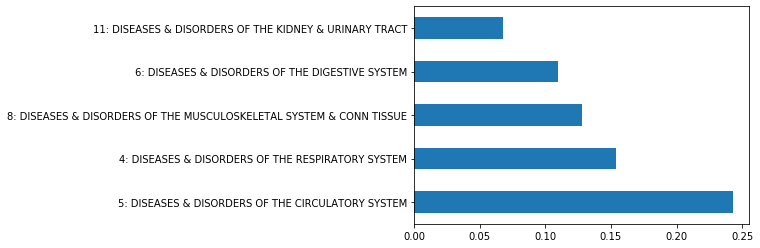

In [0]:
df.clm_drg_cd.map(drg2mdc).value_counts(normalize=True).head(5).plot.barh();

##Example 5: Typical length of stay

How long is a typical inpatient stay in hospital? To answer this, we first have to convert the information in the columns to dates, the calculate the length of stay by subtracting the end date from the start date for all events, and make a plot that shows how many events there are with 1 night in hospital, 2 nights etc:

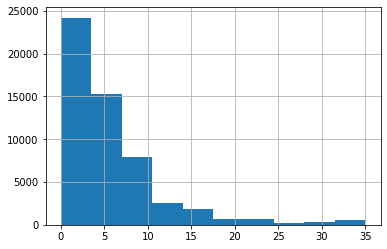

In [0]:
# Convert numeric date column to a proper date format
df['start_date'] = pd.to_datetime(df.clm_from_dt.astype(str).str.strip('.0'), 
                                  format='%Y/%m/%d', 
                                  errors='coerce')
df['end_date'] = pd.to_datetime(df.clm_thru_dt.astype(str).str.strip('.0'), 
                                  format='%Y/%m/%d', 
                                  errors='coerce')
# Obvious!
df['length_of_stay'] = df.end_date - df.start_date

# The difference could be expressed in seconds, minures and many other units
# We tell it to transform the difference to number of days

df['length_of_stay'] = df['length_of_stay'].dt.days

# Draw a plot of the distribution of length of stays
df.length_of_stay.hist();



Or, if you want a number, you could find the median, which is probably more informative that the mean in this case:

In [0]:
df.length_of_stay.median()

4.0

Or you can use *describe()* to get more information right away:

In [0]:
df.length_of_stay.describe()

count    54273.000000
mean         5.677077
std          5.643778
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         35.000000
Name: length_of_stay, dtype: float64

## Which disease group has the longest length of stay?

To answer questions about length of stay for diseases, we first make a column with the main diagnostic category:

In [0]:
# Make a column for the main diagnostic category
df['main_diagnostic_category'] = df['clm_drg_cd'].map(drg2mdc)

We then take the dataframe, split it by diagnostic category, focus on length of stay, take the mean (for each category) and sort the result:

In [0]:
# Find mean length of stay in each diagnostic category
df.groupby('main_diagnostic_category').length_of_stay.mean().sort_values(ascending=False)

main_diagnostic_category
22: BURNS                                                                      12.200000
23: FACTORS INFLUENCING HLTH STAT & OTHR CONTACTS WITH HLTH SERVCS             11.409140
0: PRINCIPAL DX CAN NOT BE ASSIGNED TO MDC                                     10.763314
19: MENTAL DISEASES & DISORDERS                                                 9.958311
18: INFECTIOUS & PARASITIC DISEASES, SYSTEMIC OR UNSPECIFIED SITES              7.851896
24: MULTIPLE SIGNIFICANT TRAUMA                                                 7.661538
17: MYELOPROLIFERATIVE DISEASES & DISORDERS, POORLY DIFFERENTIATED NEOPLASM     7.439093
25: HUMAN IMMUNODEFICIENCY VIRUS INFECTIONS                                     7.019231
4: DISEASES & DISORDERS OF THE RESPIRATORY SYSTEM                               6.002479
20: ALCOHOL/DRUG USE & ALCOHOL/DRUG INDUCED ORGANIC MENTAL DISORDERS            5.879056
9: DISEASES & DISORDERS OF THE SKIN, SUBCUTANEOUS TISSUE & BREAST               5.812

Burns appear to have the longest stays with more than 12 days.